In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def opt_results_df(files):
    cols = columns=["max_fitness", "iteration", "time"]

    df_results = pd.DataFrame(columns=cols)

    for i in files:
        df_m = pd.read_csv(i)
        file_name = i.split('/')[-1]
        
        ind_max = df_m['fitness'].idxmax()
        max_fit = df_m.loc[ind_max, 'fitness']
        iteration = df_m.loc[ind_max, 'iterations']
        time = df_m.loc[ind_max, 'time']
        
        results = [max_fit, iteration, time]

        df_t = pd.DataFrame(index=[file_name], 
                            data=[results],
                            columns=cols, dtype='float'
                           )
        df_results = pd.concat([df_results, df_t], axis=0)
        
    return df_results

def plot_fitness_curve(file, title=''):
    df = pd.read_csv(file)
    sns.lineplot(x='iterations', y='fitness', data=df)
    plt.title(title)
    plt.grid()
    plt.show()

~~~~
For Simulated Annealing
File for highest fitness: KS_SA_CE99_T10000000000000_1_LOG.csv
Achieving a fitness of: 6581.09041217
At iteration: 5090.0
This took: 0.004702682999970001(s)

~~~~
For Genetic Algorithms
File for highest fitness: KS_GA200_40_40_1_LOG.csv
Achieving a fitness of: 10130.060464299999
At iteration: 41430.0
This took: 5.537170712999999(s)

~~~~
For MIMIC
File for highest fitness: KS_MIMIC1000_10_0.5_1_LOG.csv
Achieving a fitness of: 10433.5458795
At iteration: 30320.0
This took: 506.47429899199994(s)

~~~~
For RHC
File for highest fitness: KS_RHC_5_LOG.csv
Achieving a fitness of: 6006.91064821
At iteration: 1360.0
This took: 0.00297777(s)



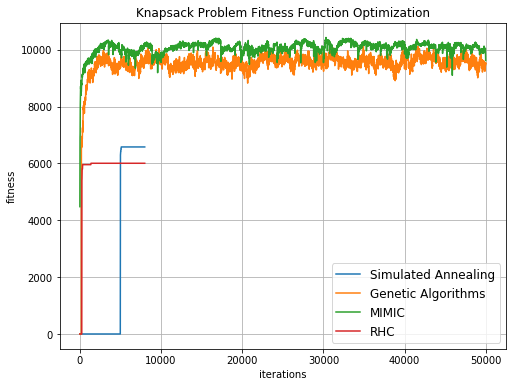

In [3]:
# Knapsack
RH_files = glob.glob("./assets/results/optimization/RHC_KS/*.csv")
SA_files = glob.glob("./assets/results/optimization/SA_KS/*.csv")
GA_files = glob.glob("./assets/results/optimization/GA_KS/*.csv")
MI_files = glob.glob("./assets/results/optimization/MIMIC_KS/*.csv")

files = {'Simulated Annealing' : SA_files, 
         'Genetic Algorithms' : GA_files, 
         'MIMIC': MI_files,
         'RHC' : RH_files}
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
plt.title("Knapsack Problem Fitness Function Optimization")
labels_ = [i for i in files]
labels = []
for name, file in files.items():
    df_results = opt_results_df(file)
    
    print("~~~~")
    print("For {}".format(name))
    max_fitness_id = df_results['max_fitness'].idxmax()
    print("File for highest fitness:", max_fitness_id)
    print("Achieving a fitness of:", df_results.loc[max_fitness_id, 'max_fitness'])
    print("At iteration:", df_results.loc[max_fitness_id, 'iteration'])
    print("This took: {}(s)\n".format(df_results.loc[max_fitness_id, 'time']))
    
    plot_file = [i for i in file if i.endswith(max_fitness_id)][0]
    df = pd.read_csv(plot_file)
    sns.lineplot(x='iterations', y='fitness', data=df, ax=ax)


for i in zip(ax.get_lines(), labels_):
    i[0].set_label(i[1])
    labels.append(i[0])
    
ax.legend(handles=labels, prop={'size': 12})

Average fitness score across 10 RHC iterations: 5337.84 ±210.61
Average number of iterations to reach max_fitness: 1185.00 ±376.08
Average time to reach max_fitness: 3.748288e-03 ±1.535545e-03


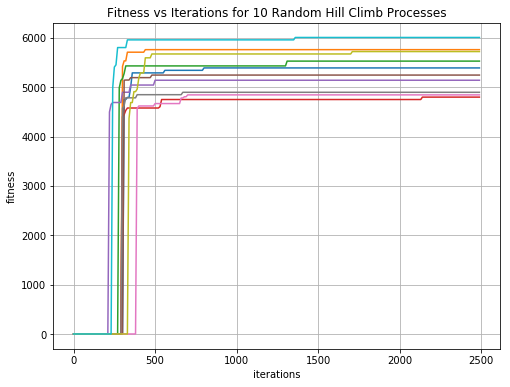

In [4]:
# RHC Review
rh_results = opt_results_df(RH_files)    
fit_avg = rh_results['max_fitness'].mean()
fit_std = rh_results['max_fitness'].std()
itr_avg = rh_results['iteration'].mean()
itr_std = rh_results['iteration'].std()
tme_avg = rh_results['time'].mean()
tme_std = rh_results['time'].std()

print("Average fitness score across 10 RHC iterations: {:.2f} \u00B1{:.2f}".format(fit_avg, fit_std/2))
print("Average number of iterations to reach max_fitness: {:.2f} \u00B1{:.2f}".format(itr_avg, itr_std/2))
print("Average time to reach max_fitness: {:e} \u00B1{:e}".format(tme_avg, tme_std/2))

fig, ax = plt.subplots(figsize=(8,6))
for file in RH_files:
    df = pd.read_csv(file)
    df = df.iloc[:250,:]
    sns.lineplot(x='iterations', y='fitness', data=df, ax=ax)

plt.title("Fitness vs Iterations for 10 Random Hill Climb Processes")
plt.grid()

~~~~
For Simulated Annealing
File for highest fitness: TC_SA_CE80_T10_1_LOG.csv
Achieving a fitness of: 444.0
At iteration: 4060.0
This took: 0.00928408199968(s)

~~~~
For Genetic Algorithms
File for highest fitness: TC_GA300_30_40_1_LOG.csv
Achieving a fitness of: 379.0
At iteration: 4700.0
This took: 2.124252805(s)

~~~~
For MIMIC
File for highest fitness: TC_MIMIC1000_20_0.9_1_LOG.csv
Achieving a fitness of: 401.0
At iteration: 3070.0
This took: 516.599039384(s)

~~~~
For RHC
File for highest fitness: TC_RHC_1_LOG.csv
Achieving a fitness of: 408.0
At iteration: 3530.0
This took: 0.0339085490002(s)



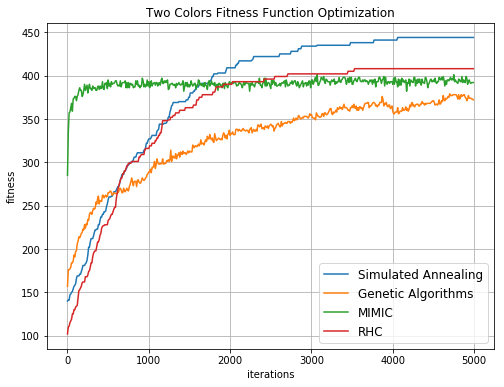

In [5]:
# K-Colors
RH_files = glob.glob("./assets/results/optimization/RHC_TC/*.csv")
SA_files = glob.glob("./assets/results/optimization/SA_TC/*.csv")
GA_files = glob.glob("./assets/results/optimization/GA_TC/*.csv")
MI_files = glob.glob("./assets/results/optimization/MIMIC_TC/*.csv")

files = {'Simulated Annealing' : SA_files, 
         'Genetic Algorithms' : GA_files, 
         'MIMIC': MI_files,
         'RHC' : RH_files}
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
plt.title("Two Colors Fitness Function Optimization")
labels_ = [i for i in files]
labels = []
for name, file in files.items():
    df_results = opt_results_df(file)
    
    print("~~~~")
    print("For {}".format(name))
    max_fitness_id = df_results['max_fitness'].idxmax()
    print("File for highest fitness:", max_fitness_id)
    print("Achieving a fitness of:", df_results.loc[max_fitness_id, 'max_fitness'])
    print("At iteration:", df_results.loc[max_fitness_id, 'iteration'])
    print("This took: {}(s)\n".format(df_results.loc[max_fitness_id, 'time']))
    
    plot_file = [i for i in file if i.endswith(max_fitness_id)][0]
#     plot_fitness_curve(plot_file, title="Fitness curve for best file; {}".format(max_fitness_id.split('.')[0]))
    df = pd.read_csv(plot_file)
    sns.lineplot(x='iterations', y='fitness', data=df, ax=ax)


for i in zip(ax.get_lines(), labels_):
    i[0].set_label(i[1])
    labels.append(i[0])
    
ax.legend(handles=labels, prop={'size': 12})
None

~~~~
For Simulated Annealing
File for highest fitness: TP_SA0.6_1_LOG.csv
Achieving a fitness of: 0.0707226035238
At iteration: 9850.0
This took: 0.0135422370001(s)

~~~~
For Genetic Algorithms
File for highest fitness: TP_GA200_30_30_1_LOG.csv
Achieving a fitness of: 0.115212691041
At iteration: 7780.0
This took: 1.699407724(s)

~~~~
For MIMIC
File for highest fitness: TP_MIMIC1000_20_0.9_1_LOG.csv
Achieving a fitness of: 0.0251305499051
At iteration: 9820.0
This took: 2136.33306421(s)

~~~~
For RHC
File for highest fitness: TP_RHC_1_LOG.csv
Achieving a fitness of: 0.06670742555669999
At iteration: 9700.0
This took: 0.0328966729998(s)



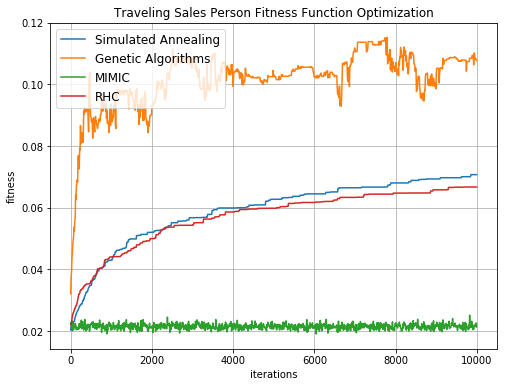

In [6]:
# Travelling Sales Person
RH_files = glob.glob("./assets/results/optimization/RHC_TP/*.csv")
SA_files = glob.glob("./assets/results/optimization/SA_TP/*.csv")
GA_files = glob.glob("./assets/results/optimization/GA_TP/*.csv")
MI_files = glob.glob("./assets/results/optimization/MIMIC_TP/*.csv")

files = {'Simulated Annealing' : SA_files, 
         'Genetic Algorithms' : GA_files, 
         'MIMIC': MI_files,
         'RHC' : RH_files}
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
plt.title("Traveling Sales Person Fitness Function Optimization")
labels_ = [i for i in files]
labels = []
for name, file in files.items():
    df_results = opt_results_df(file)
    
    print("~~~~")
    print("For {}".format(name))
    max_fitness_id = df_results['max_fitness'].idxmax()
    print("File for highest fitness:", max_fitness_id)
    print("Achieving a fitness of:", df_results.loc[max_fitness_id, 'max_fitness'])
    print("At iteration:", df_results.loc[max_fitness_id, 'iteration'])
    print("This took: {}(s)\n".format(df_results.loc[max_fitness_id, 'time']))
    
    plot_file = [i for i in file if i.endswith(max_fitness_id)][0]
    df = pd.read_csv(plot_file)
    sns.lineplot(x='iterations', y='fitness', data=df, ax=ax)
    
for i in zip(ax.get_lines(), labels_):
    i[0].set_label(i[1])
    labels.append(i[0])
    
ax.legend(handles=labels, prop={'size': 12})
None